# <font style = "color:rgb(50,120,229)"> Coin Detection </font>

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

Text(0.5, 1.0, 'Original Image')

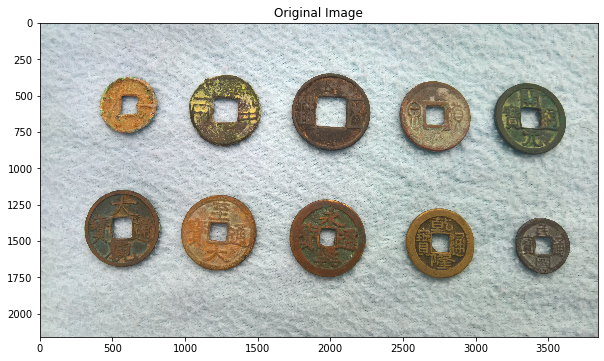

In [612]:
# Image path
imagePath = "CoinsB.png"
# Read image
# Store it in variable image
###
image = cv2.imread(imagePath)
###
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")

## <font style = "color:rgb(50,120,229)">Step 2.1: Convert Image to Grayscale</font>

In [613]:
# Convert to grayscale
# Store in variable imageGray
###
imageGray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
###

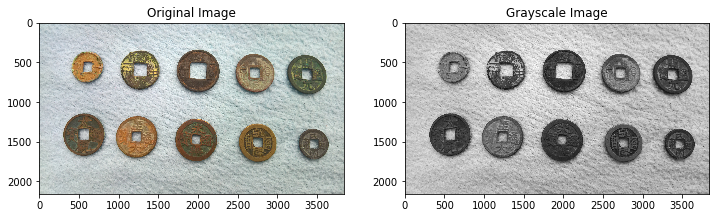

In [614]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(122)
plt.imshow(imageGray);
plt.title("Grayscale Image");

## <font style = "color:rgb(50,120,229)">Step 2.2: Split Image into R,G,B Channels</font>

In [615]:
# Split cell into channels
# Variables are: imageB, imageG, imageR
###
imageB = image[:,:,0]
imageG = image[:,:,1]
imageR = image[:,:,2]
###

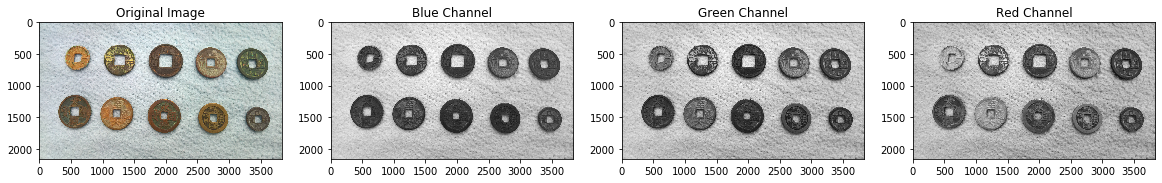

In [616]:
plt.figure(figsize=(20,12))
plt.subplot(141)
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.subplot(142)
plt.imshow(imageB);
plt.title("Blue Channel")
plt.subplot(143)
plt.imshow(imageG);
plt.title("Green Channel")
plt.subplot(144)
plt.imshow(imageR);
plt.title("Red Channel");

## <font style = "color:rgb(50,120,229)">Step 3.1: Perform Thresholding</font>


I chose to continue our coin detection with the Blue Channel image. I find it the most convenient to use, because of the visible contrast between the coins and the background.

In [617]:
thresh = 100
maxValue = 255

First I decided to see which thresholding will be the most useful to me:

In [618]:
th, dst_bin = cv2.threshold(imageB, thresh, maxValue, cv2.THRESH_BINARY)
th, dst_bin_inv = cv2.threshold(imageB, thresh, maxValue, cv2.THRESH_BINARY_INV)
th, dst_trunc = cv2.threshold(imageB, thresh, maxValue, cv2.THRESH_TRUNC)
th, dst_to_zero = cv2.threshold(imageB, thresh, maxValue, cv2.THRESH_TOZERO)
th, dst_to_zero_inv = cv2.threshold(imageB, thresh, maxValue, cv2.THRESH_TOZERO_INV)

Threshold Value = 100, Max Value = 255


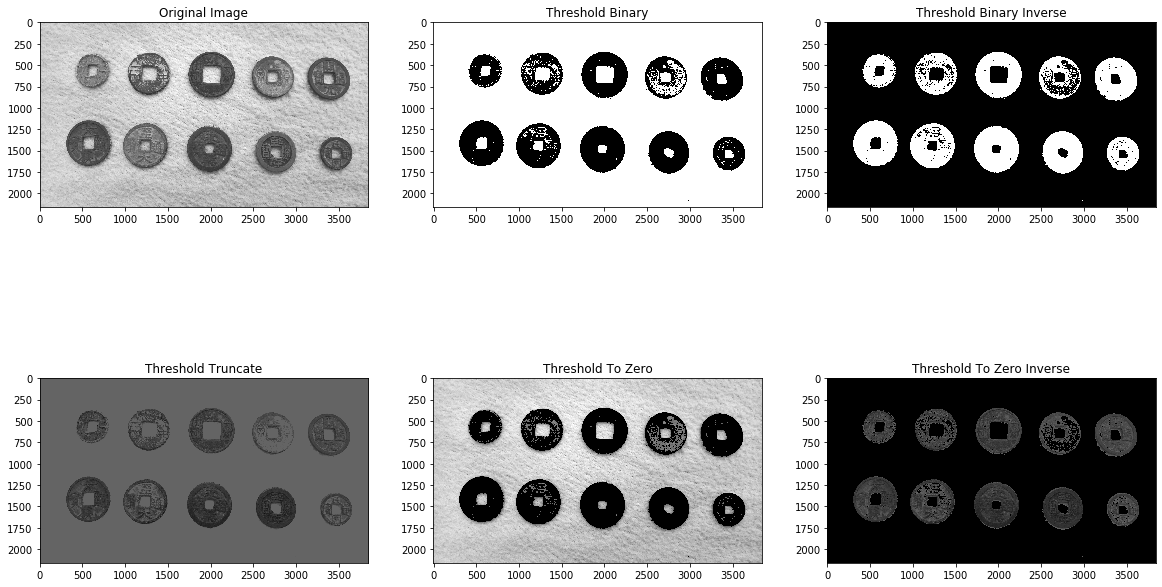

In [619]:
print("Threshold Value = {}, Max Value = {}".format(thresh, maxValue))
plt.figure(figsize=[20,12])
plt.subplot(231);plt.imshow(imageG, cmap='gray', vmin=0, vmax=255);plt.title("Original Image");
plt.subplot(232);plt.imshow(dst_bin, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary");
plt.subplot(233);plt.imshow(dst_bin_inv, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary Inverse");
plt.subplot(234);plt.imshow(dst_trunc, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Truncate");
plt.subplot(235);plt.imshow(dst_to_zero, cmap='gray', vmin=0, vmax=255);plt.title("Threshold To Zero");
plt.subplot(236);plt.imshow(dst_to_zero_inv, cmap='gray', vmin=0, vmax=255);plt.title("Threshold To Zero Inverse");

I decided to continue with binary thresholding. Now it is time to experiment with our "thresh" value. We see that we had trouble with lighter coins, so we will try to increase the "thresh" value.

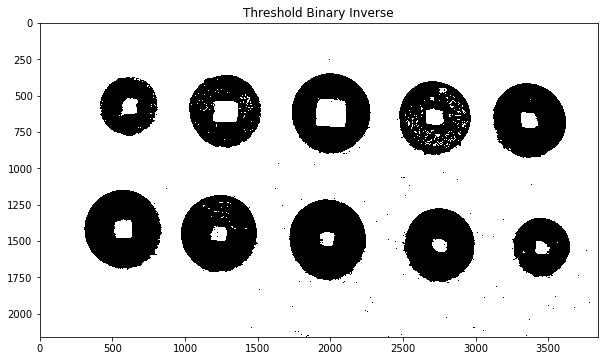

In [620]:
thresh = 125
th, dst_bin_inv = cv2.threshold(imageB, thresh, maxValue, cv2.THRESH_BINARY)
plt.imshow(dst_bin_inv, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary Inverse");

We almost got it, but we can do a bit better. Let's try increasing the threshold value a little more.

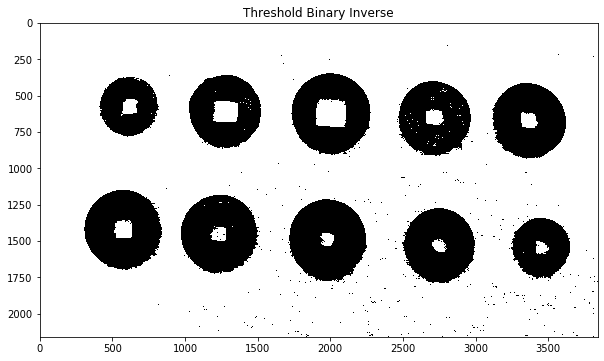

In [621]:
thresh = 140
th, imageThresholded = cv2.threshold(imageB, thresh, maxValue, cv2.THRESH_BINARY)
plt.imshow(imageThresholded, cmap='gray', vmin=0, vmax=255);plt.title("Threshold Binary Inverse");

This should be enough

## <font style = "color:rgb(50,120,229)">Step 3.2: Perform morphological operations</font>

In [664]:
kSmallSize = (3,3)
kMediumSize = (5,5)
kBigSize = (9,9)
smallElipseKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kSmallSize)
mediumElipseKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kMediumSize)
bigElipseKernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, kBigSize)
smallCrossKernel = cv2.getStructuringElement(cv2.MORPH_CROSS, kSmallSize)
mediumCrossKernel = cv2.getStructuringElement(cv2.MORPH_CROSS, kMediumSize)
bigCrossKernel = cv2.getStructuringElement(cv2.MORPH_CROSS, kBigSize)

Image after opening:

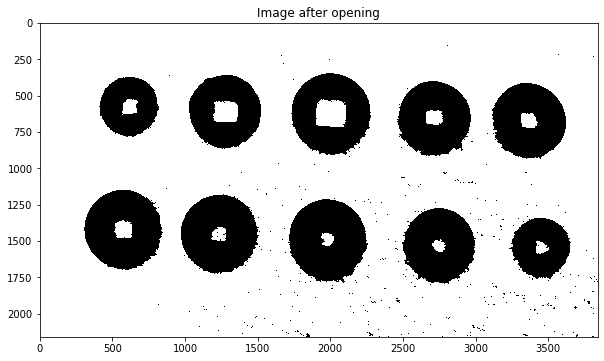

In [665]:
imageOpened = cv2.morphologyEx(imageThresholded, cv2.MORPH_OPEN, smallElipseKernel,iterations=5)
plt.imshow(imageOpened, cmap='gray', vmin=0, vmax=255);plt.title("Image after opening");

Image after closing:

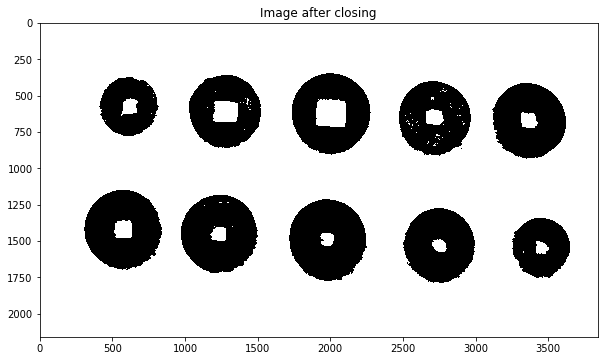

In [666]:
imageClosed = cv2.morphologyEx(imageThresholded, cv2.MORPH_CLOSE, smallElipseKernel,iterations=5)
plt.imshow(imageClosed, cmap='gray', vmin=0, vmax=255);plt.title("Image after closing");

It seems that we should start with closing, but let's first see what will we get if we do opening then closing.

Image after opening then closing:

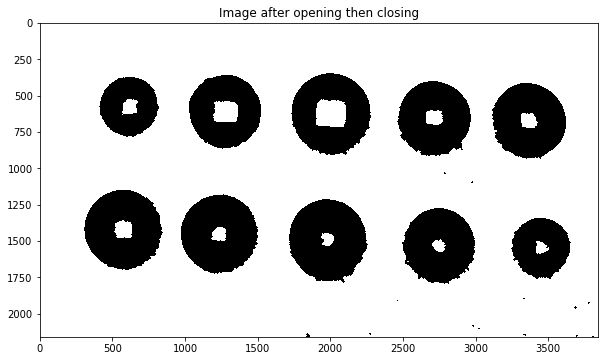

In [667]:
imageOpenedClosed = cv2.morphologyEx(cv2.morphologyEx(imageThresholded, cv2.MORPH_OPEN, 
                                                      smallElipseKernel,iterations=5), 
                                     cv2.MORPH_CLOSE, smallElipseKernel,iterations=5)
plt.imshow(imageOpenedClosed, cmap='gray', vmin=0, vmax=255);plt.title("Image after opening then closing");

Image after closing then opening:

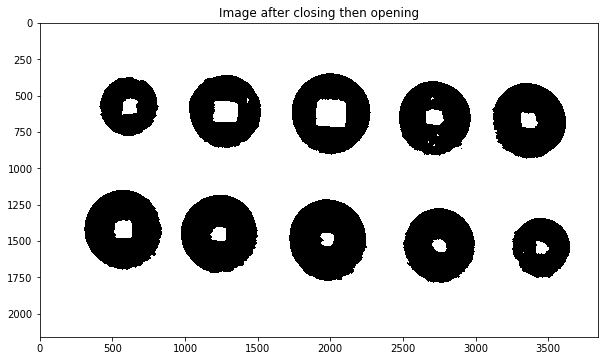

In [668]:
imageClosedOpened = cv2.morphologyEx(cv2.morphologyEx(imageThresholded, cv2.MORPH_CLOSE, 
                                                      smallElipseKernel,iterations=5), 
                                     cv2.MORPH_OPEN, smallElipseKernel,iterations=5)
plt.imshow(imageClosedOpened, cmap='gray', vmin=0, vmax=255);plt.title("Image after closing then opening");

Just as I thought, it is better to start with closing. Now let's adjust number of iterations. Let's start with closing iterations.

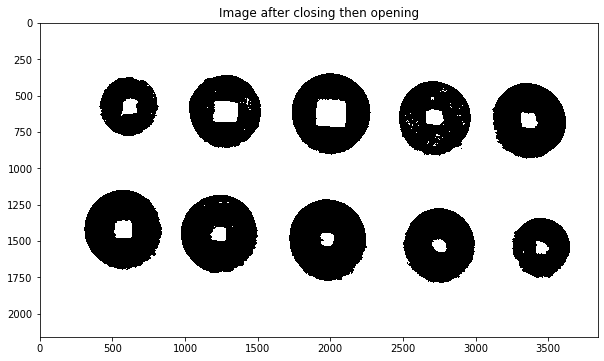

In [669]:
imageClosed = cv2.morphologyEx(imageThresholded, cv2.MORPH_CLOSE, smallElipseKernel,iterations=5)
plt.imshow(imageClosed, cmap='gray', vmin=0, vmax=255);plt.title("Image after closing then opening");

5 is good, but lets try a bit more.

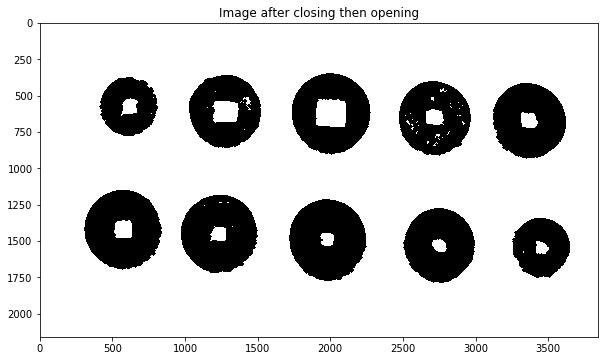

In [670]:
imageClosed = cv2.morphologyEx(imageThresholded, cv2.MORPH_CLOSE, smallElipseKernel,iterations=10)
plt.imshow(imageClosed, cmap='gray', vmin=0, vmax=255);plt.title("Image after closing then opening");

We see that now we overdid it. We will stay with 5 iterations for closing. Now for opening iterations.

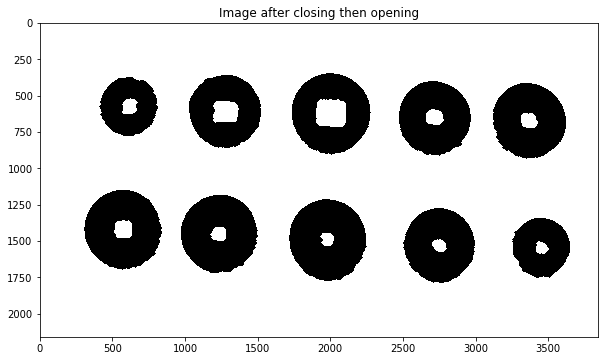

In [671]:
imageOpened = cv2.morphologyEx(imageClosed, cv2.MORPH_OPEN, smallElipseKernel,iterations=15)
plt.imshow(imageOpened, cmap='gray', vmin=0, vmax=255);plt.title("Image after closing then opening");

15 is not enough. Lets try more.

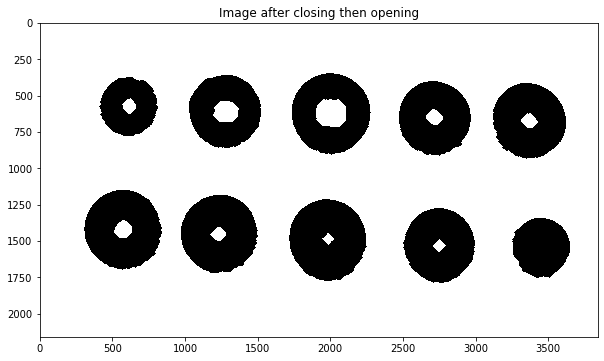

In [672]:
imageOpened = cv2.morphologyEx(imageClosed, cv2.MORPH_OPEN, smallElipseKernel,iterations=40)
plt.imshow(imageOpened, cmap='gray', vmin=0, vmax=255);plt.title("Image after closing then opening");

We see the difference. Lets try even more.

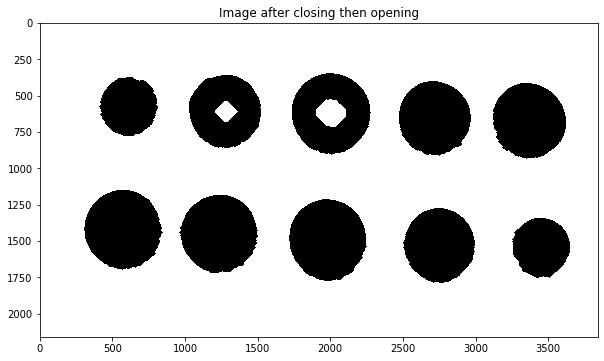

In [673]:
imageOpened = cv2.morphologyEx(imageClosed, cv2.MORPH_OPEN, smallElipseKernel,iterations=70)
plt.imshow(imageOpened, cmap='gray', vmin=0, vmax=255);plt.title("Image after closing then opening");

Almost! What if we do even more?

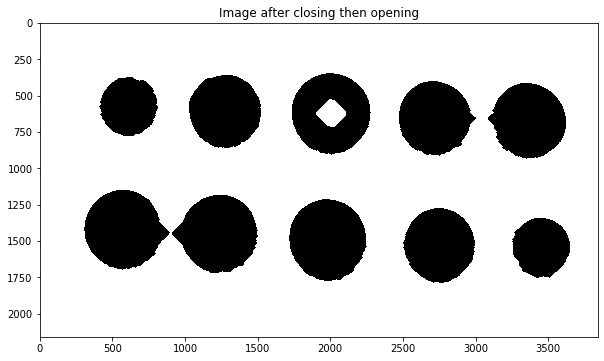

In [674]:
imageOpened = cv2.morphologyEx(imageClosed, cv2.MORPH_OPEN, smallElipseKernel,iterations=80)
plt.imshow(imageOpened, cmap='gray', vmin=0, vmax=255);plt.title("Image after closing then opening");

And we overdid it. Lets stay with what we have and try some more operations

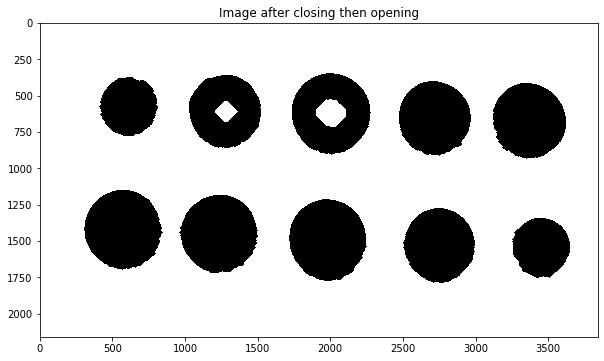

In [675]:
imageOpened = cv2.morphologyEx(imageClosed, cv2.MORPH_OPEN, smallElipseKernel,iterations=70)
plt.imshow(imageOpened, cmap='gray', vmin=0, vmax=255);plt.title("Image after closing then opening");

Lets try some more opening with bigger kernels:

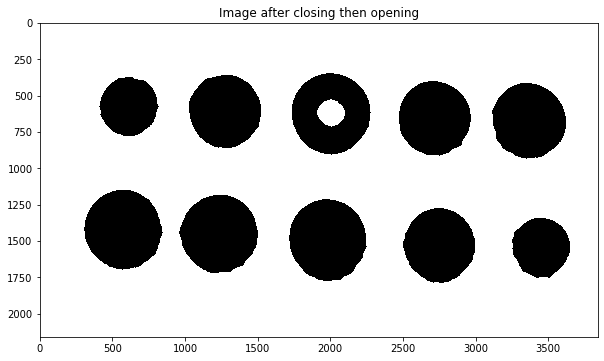

In [684]:
imageOpenedBig = cv2.morphologyEx(imageOpened, cv2.MORPH_OPEN, bigElipseKernel,iterations=14)
plt.imshow(imageOpenedBig, cmap='gray', vmin=0, vmax=255);plt.title("Image after closing then opening");

It did help a bit

## <font style = "color:rgb(50,120,229)">Step 4.1: Create SimpleBlobDetector</font>

In [685]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.8

In [686]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

## <font style = "color:rgb(50,120,229)">Step 4.2: Detect Coins</font>

In [687]:
# Detect blobs
###
keypoints = detector.detect(imageOpenedBig)
print("Number of coins detected: {}".format(len(keypoints)))
###

Number of coins detected: 9


## <font style = "color:rgb(50,120,229)">Step 4.3: Display the detected coins on original image</font>


In [688]:
# Mark coins using image annotation concepts we have studied so far
###
finalImage = image.copy()
for k in keypoints:
    x,y = k.pt
    x=int(round(x))
    y=int(round(y))
    # Mark center in BLACK
    cv2.circle(finalImage,(x,y),15,(0,0,0),-1)
    # Get radius of blob
    diameter = k.size
    radius = int(round(diameter/2))
    # Mark blob in green
    cv2.circle(finalImage,(x,y),radius,(0,0,255),10)
###

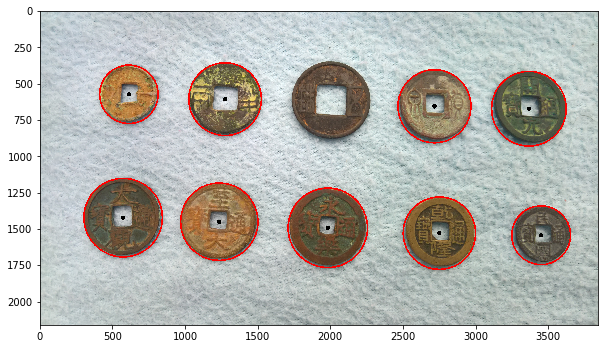

In [689]:
# Display the final image
###
plt.imshow(finalImage[:,:,::-1])
###

## <font style = "color:rgb(50,120,229)">Step 4.4: Perform Connected Component Analysis</font>

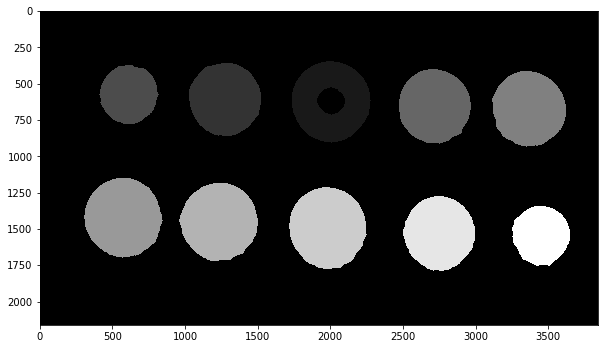

In [690]:
# Find connected components
###
th, imThresh = cv2.threshold(imageOpenedBig, 127, 255, cv2.THRESH_BINARY_INV)
_, imLabels = cv2.connectedComponents(imThresh)
###
plt.imshow(imLabels)

In [691]:
print(np.shape(imLabels))

(2160, 3840)


In [692]:
# Print number of connected components detected
###
print("Number of connected components detected = {}".format(imLabels.max()+1))
###

Number of connected components detected = 11


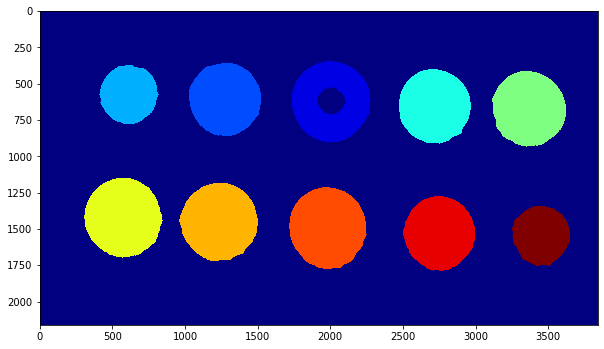

In [693]:
# Display connected components using displayConnectedComponents
# function
###
displayConnectedComponents(imLabels)
###

## <font style = "color:rgb(50,120,229)">Step 4.5: Detect coins using Contour Detection</font>


In [694]:
# Find all contours in the image
###
contours, hierarchy = cv2.findContours(imageOpenedBig, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
###

In [695]:
# Print the number of contours found
###
print("Number of contours found = {}".format(len(contours)))
###

Number of contours found = 12


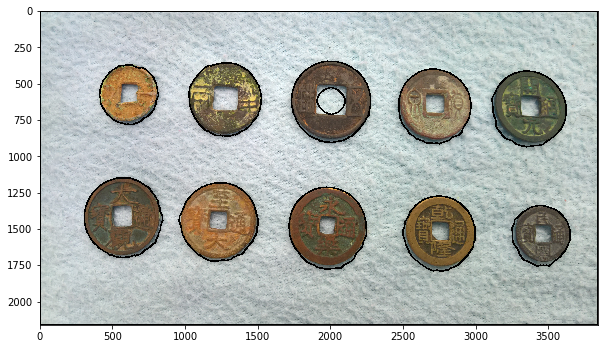

In [697]:
# Draw all contours
###
imageContours = image.copy()
cv2.drawContours(imageContours, contours, -1, (0,0,0), 10)
plt.imshow(imageContours[:,:,::-1])
###

In [699]:
# Print area and perimeter of all contours
###
for index,cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    print("Contour #{} has area = {} and perimeter = {}".format(index+1,area,perimeter))
###

Contour #1 has area = 127419.0 and perimeter = 1357.5331791639328
Contour #2 has area = 195643.0 and perimeter = 1674.5525176525116
Contour #3 has area = 233370.5 and perimeter = 1829.9078480005264
Contour #4 has area = 223629.5 and perimeter = 1800.3342546224594
Contour #5 has area = 227801.0 and perimeter = 1815.8073424100876
Contour #6 has area = 26030.5 and perimeter = 604.2813098430634
Contour #7 has area = 206248.5 and perimeter = 1725.1382962465286
Contour #8 has area = 199522.0 and perimeter = 1693.8418327569962
Contour #9 has area = 127157.5 and perimeter = 1366.7463830709457
Contour #10 has area = 196006.5 and perimeter = 1673.540316104889
Contour #11 has area = 236696.0 and perimeter = 1833.807345867157
Contour #12 has area = 8288401.0 and perimeter = 11996.0


In [700]:
# Print maximum area of contour
# This will be the box that we want to remove
###
print("Maximum area of contour = {}".format(cv2.contourArea(contours[11])))
###

Maximum area of contour = 8288401.0


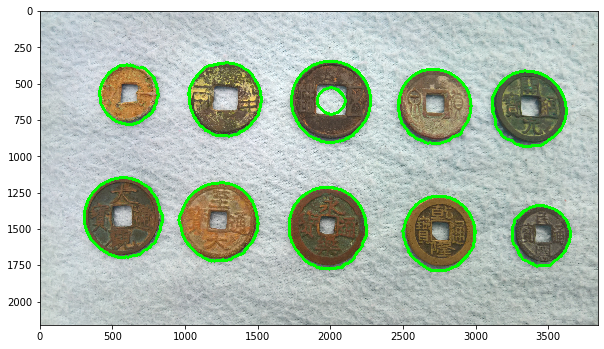

In [701]:
# Remove this contour and plot others
###
contours = contours[:-1]
imageContours = image.copy()
cv2.drawContours(imageContours, contours, -1, (0,255,0), 20)
plt.imshow(imageContours[:,:,::-1])
###

Now, we have to remove the internal contours. Again here we can use area or perimeter.

In [702]:
# Print sorted area of contours
###
cntsSorted = sorted(contours, key=lambda x: cv2.contourArea(x))
idxSorted = sorted(range(len(contours)), key=lambda x: cv2.contourArea(contours[x]))
for idx, cnt in enumerate(cntsSorted):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    print("Contour #{} has area = {} and perimeter = {}".format(idxSorted[idx]+1,area,perimeter))
###

Contour #6 has area = 26030.5 and perimeter = 604.2813098430634
Contour #9 has area = 127157.5 and perimeter = 1366.7463830709457
Contour #1 has area = 127419.0 and perimeter = 1357.5331791639328
Contour #2 has area = 195643.0 and perimeter = 1674.5525176525116
Contour #10 has area = 196006.5 and perimeter = 1673.540316104889
Contour #8 has area = 199522.0 and perimeter = 1693.8418327569962
Contour #7 has area = 206248.5 and perimeter = 1725.1382962465286
Contour #4 has area = 223629.5 and perimeter = 1800.3342546224594
Contour #5 has area = 227801.0 and perimeter = 1815.8073424100876
Contour #3 has area = 233370.5 and perimeter = 1829.9078480005264
Contour #11 has area = 236696.0 and perimeter = 1833.807345867157


We can clearly see the jump from 1nd area to 2rd. These is 1 inner contour.

In [703]:
# Remove the inner contour
del contours[idxSorted[0]]

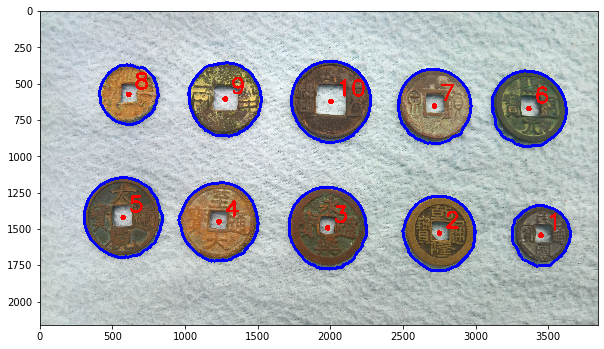

In [705]:
# Plot the rest of them
###
imageContours = image.copy()
for idx, cnt in enumerate(contours):
    M = cv2.moments(cnt)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])

    cv2.drawContours(imageContours, [cnt], -1, (255, 0, 0), 20)
    cv2.circle(imageContours, (cX, cY), 20, (0, 0, 255), -1)
    cv2.putText(imageContours, str(idx+1), (cX + 40, cY - 40), cv2.FONT_HERSHEY_SIMPLEX, 5, (0, 0, 255), 15)
plt.imshow(imageContours[:,:,::-1])
###

Number of coins detected = 10


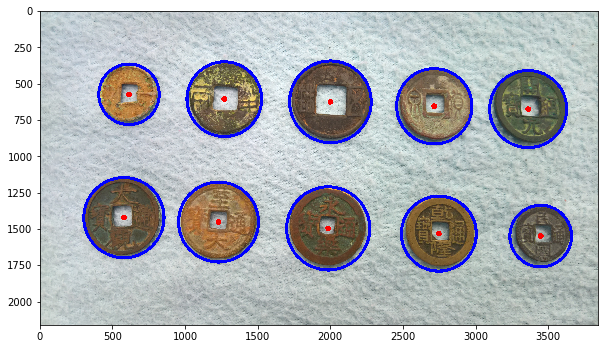

In [706]:
# Fit circles on coins
###
imageCircles = image.copy()
print("Number of coins detected = {}".format(len(contours)))

for cnt in contours:
    # Fit a circle
    ((x,y),radius) = cv2.minEnclosingCircle(cnt)
    cv2.circle(imageCircles, (int(x),int(y)), 20, (0,0,255), -1);
    cv2.circle(imageCircles, (int(x),int(y)), int(round(radius)), (255,0,0), 20)
    
plt.imshow(imageCircles[:,:,::-1])
###